# Player Injury Analysis

**Football clubs are increasingly focusing on injury prevention to preserve athletes' health and physical condition. Top-tier clubs can play several matches in a single week and results in a heavy workload for the players.**

This project uses a dataset obtained from [Kaggle](https://www.kaggle.com/datasets/mrsimple07/injury-prediction-dataset/data) that contains important information surrounding injuries, such as player demographics, injury history and if a player is likely to get injured. 


In [81]:
import pandas as pd

In [82]:
# Load the dataset from Kaggle
df = pd.read_csv("injury_data.csv")

## 1. Exploring the Dataset

In [83]:
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [84]:
df.columns

Index(['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
       'Training_Intensity', 'Recovery_Time', 'Likelihood_of_Injury'],
      dtype='object')

In [85]:
print(f"Our dataset contains {df.shape[0]} observations and {df.shape[1]} features.")

Our dataset contains 1000 observations and 7 features.


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [87]:
df.isna().sum()

Player_Age              0
Player_Weight           0
Player_Height           0
Previous_Injuries       0
Training_Intensity      0
Recovery_Time           0
Likelihood_of_Injury    0
dtype: int64

In [88]:
df.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


The dataset is already pretty clean so I'll move on to creating additional features.

## 2. Feature Engineering

In [89]:
# Let's start by rounding the variables with decimal numbers just to make reading their values easier
df['Player_Height'] = df['Player_Height'].round(2)
df['Player_Weight'] = df['Player_Weight'].round(2)
df['Training_Intensity'] = df['Training_Intensity'].round(2)

In [90]:
df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.25,175.73,1,0.46,5,0
1,37,71.00,174.58,0,0.23,6,1
2,32,80.09,186.33,0,0.61,2,1
3,28,87.47,175.50,1,0.25,4,1
4,25,84.66,190.18,0,0.58,1,1


### 2.1. Body Mass Index

We can use a Player's Weight and Height to calculate its Body Mass Index (BMI) and have a grasp on his body aptitude level. In an ideal world, we would have more information like muscle mass and bone density to help paint a more complete picture.

Using BMI, I'll also classificate if a player is underweight, normal, or overweight.

In [91]:
# Calculating BMI (it uses height in meters)
df['BMI'] = df['Player_Weight'] / (df['Player_Height'] / 100) ** 2

## Classifing a player according to its BMI
gaps = [-float('inf'), 18.5, 24.9, 29.9, float('inf')]
categories = ['Underweight', 'Normal', 'Overweight', 'Obesity']

df['BMI_Classification'] = pd.cut(df['BMI'], bins=gaps, labels=categories, right=False)

### 2.2. Age Group

Looking at a player's age group instead of an absolute value can also be valuable.

In [92]:
# Min and Max player's age
min_age = df['Player_Age'].min()
max_age = df['Player_Age'].max()

# 5 age groups
df["Age_Group"] = pd.cut(
    df["Player_Age"],
    bins=[min_age, 21, 25, 29, 33, max_age],
    labels=["18-21", "22-25", "26-29", "30-33", "34+"],
    include_lowest=True,
)

df.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI,BMI_Classification,Age_Group
0,24,66.25,175.73,1,0.46,5,0,21.453298,Normal,22-25
1,37,71.00,174.58,0,0.23,6,1,23.295357,Normal,34+
2,32,80.09,186.33,0,0.61,2,1,23.068148,Normal,30-33
3,28,87.47,175.50,1,0.25,4,1,28.399120,Overweight,26-29
4,25,84.66,190.18,0,0.58,1,1,23.407152,Normal,22-25


## 3. Exploratory Data Analysis

Let's look at the likelihood of a player getting injured across age groups, bmi classification and training intensity.

### 3.1. Age Group

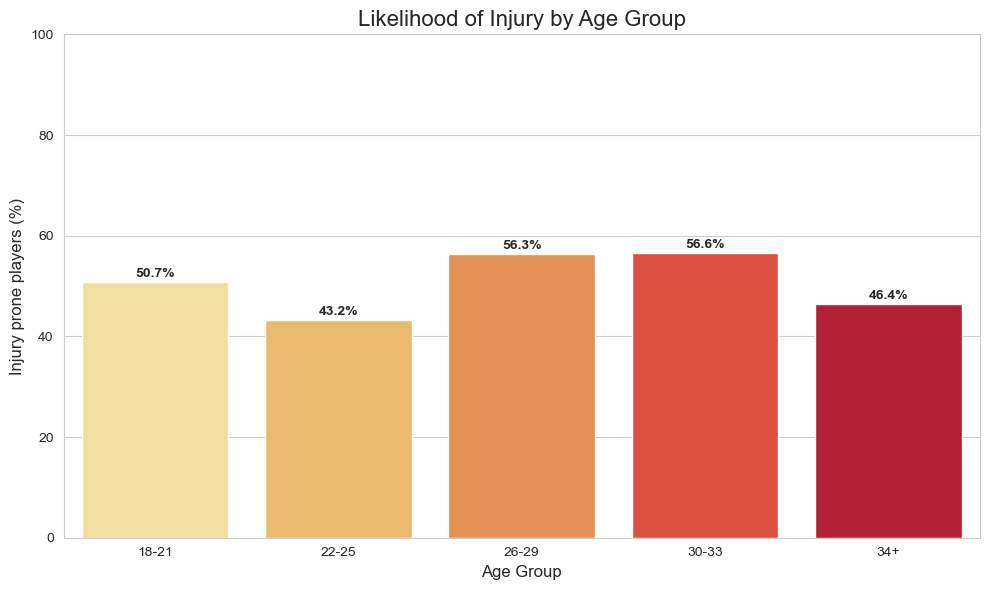

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
plt.style.use('default')
sns.set_style("whitegrid")

# Calculate the percentage of injury prone players by age group
injury_by_age = df.groupby('Age_Group', observed=True)['Likelihood_of_Injury'].mean() * 100

# Create a figure
plt.figure(figsize=(10, 6))

# Choose a specific color pallete
colors = sns.color_palette("YlOrRd", len(injury_by_age))

# Create the bar plot
ax = sns.barplot(
    x=injury_by_age.index, 
    y=injury_by_age.values, 
    hue=injury_by_age.index,  
    palette="YlOrRd",
    legend=False  
)

# Add percentage labels on top of each bar
for i, v in enumerate(injury_by_age.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Set titles and labels
plt.title('Likelihood of Injury by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Injury prone players (%)', fontsize=12)
plt.ylim(0, 100)

plt.tight_layout()

# Show the plot
plt.show()

We can see that older players are more prone to getting injured, with the surprising exception of players that are 34 or more years old. 

### 3.2. BMI group

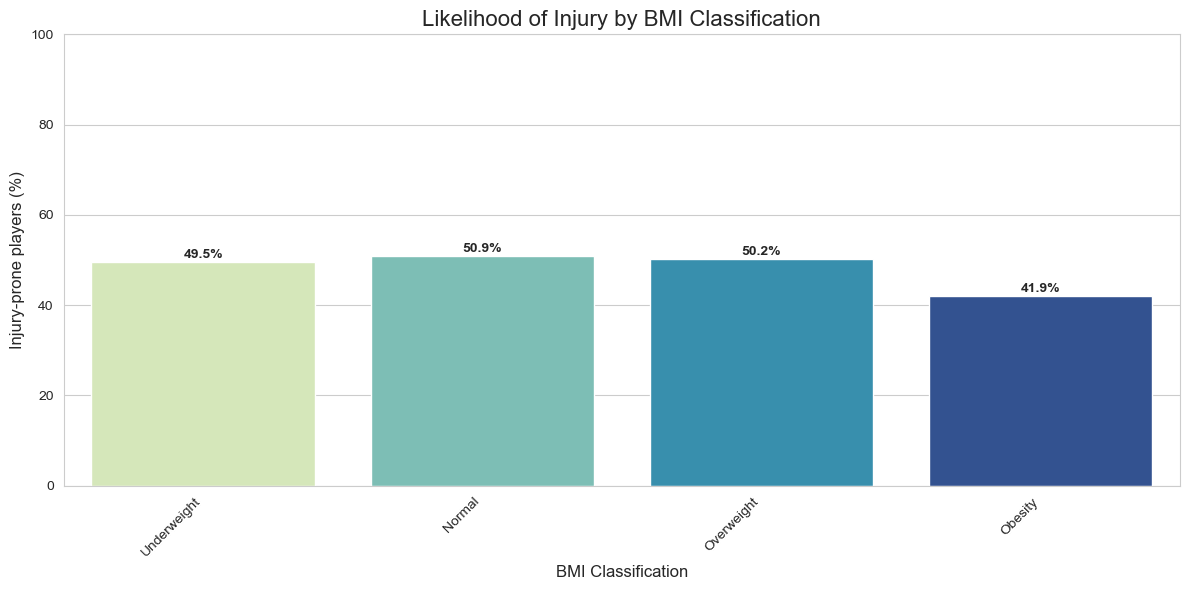

In [94]:
# First, we calculate the percentage of number of player likely to get injured by BMI classification
injury_by_bmi = df.groupby('BMI_Classification', observed=True)['Likelihood_of_Injury'].mean() * 100

plt.figure(figsize=(12, 6))

# Create the bar plot
ax = sns.barplot(x=injury_by_bmi.index, 
    y=injury_by_bmi.values,
    hue=injury_by_bmi.index, 
    palette="YlGnBu"  
)

# Add percentage labels on top of each bar
for i, v in enumerate(injury_by_bmi.values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

# Set titles and labels
plt.title('Likelihood of Injury by BMI Classification', fontsize=16)
plt.xlabel('BMI Classification', fontsize=12)
plt.ylabel('Injury-prone players (%)', fontsize=12)
plt.ylim(0, 100)  # Set y-axis to percentage scale

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


Surprisingly, we don't find a clear correlation between a higher BMI (group) and the likelihood of getting injuried. Actually, a low percentage of obese players are likely to get injured. There must be some hidden reasons for this suc has, if a player is obese, he is less likely to play and have an heavy workload.

### 3.3. Training Intensity

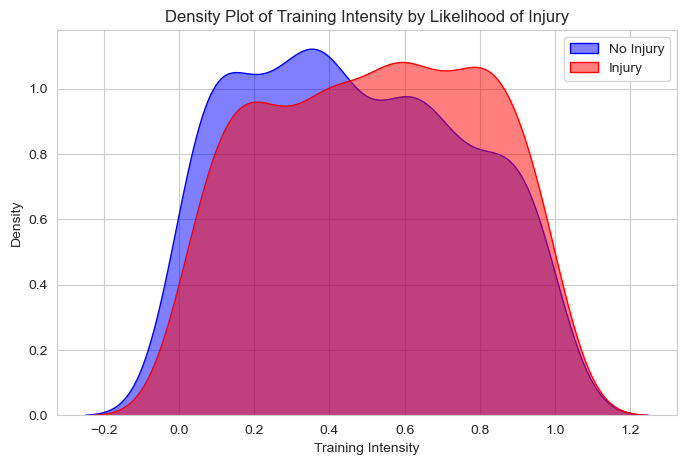

In [95]:
# Create the density plot
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Likelihood_of_Injury"] == False]["Training_Intensity"], fill=True, color="blue", alpha=0.5, label="No Injury")
sns.kdeplot(df[df["Likelihood_of_Injury"] == True]["Training_Intensity"], fill=True, color="red", alpha=0.5, label="Injury")
plt.xlabel("Training Intensity")
plt.ylabel("Density")
plt.title("Density Plot of Training Intensity by Likelihood of Injury")
plt.legend()
plt.grid(True)
plt.show()

This density plot regarding training intensity seems to show a correlation between higher intensity and higher likelihood of injury, which was expected.

# 4. Data Modelling

Before creating a model to predict if a player is likely to get injured or not, we have to encode the categorical features that we created previously.

In [96]:
from sklearn.preprocessing import OneHotEncoder

# Categorical columns
categ_cols = ["BMI_Classification","Age_Group"]

# Select those same categories
df_categorical = df[categ_cols]

# Encode them
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical)

# Get their names and create a dataframe with these features
one_hot_feature_names = encoder.get_feature_names_out(categ_cols)
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=one_hot_feature_names)

# Join the two dataframes to create the final one and drop the old features
df_final = pd.concat([df, df_encoded], axis=1)
df_final.drop(columns=['BMI_Classification', 'Age_Group'], inplace=True)

Now let's split the data between features and target variable and also between training and testing data. Since the dataset is extremely small, I'll do a 90:10 train:test split.

In [97]:
from sklearn.model_selection import train_test_split

X = df_final.drop('Likelihood_of_Injury', axis=1)
y = df_final['Likelihood_of_Injury']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

We'll train 4 models and compare its results:
- Logistic Regression
- Random Forest
- XGBoost
- LightGBM

For Logistic Regression, we'll create a scaled (standardized) version of the dataset. This model is sensitive to features magnitudes so scaling ensures that all features contribute equally to the model.

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# Standardize features (for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 441, number of negative: 459
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490000 -> initscore=-0.040005
[LightGBM] [Info] Start training from score -0.040005


In [99]:
# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_preds))

Logistic Regression Accuracy: 0.56
Random Forest Accuracy: 0.6
XGBoost Accuracy: 0.54
LightGBM Accuracy: 0.57


In [100]:
from sklearn.metrics import recall_score

# Calculate recall scores
log_recall = recall_score(y_test, log_preds)
rf_recall = recall_score(y_test, rf_preds)
xgb_recall = recall_score(y_test, xgb_preds)
lgb_recall = recall_score(y_test, lgb_preds)

# Print recall scores
print("\n--- Recall Score Comparison ---")
print(f"Logistic Regression Recall: {log_recall:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"XGBoost Recall: {xgb_recall:.2f}")
print(f"LightGBM Recall: {lgb_recall:.2f}")


--- Recall Score Comparison ---
Logistic Regression Recall: 0.44
Random Forest Recall: 0.59
XGBoost Recall: 0.46
LightGBM Recall: 0.49


The Random Forest model achieved the best accuracy, but performed especially well on the recall score when compared to the alternatives.

The recall score measures how well a model identifies actual positive cases (injuried players). **Why is this important?**
- In this context, False Negatives are dangerous and choosing a model that minimises this ensures that injured players are not overlooked.

## Final Remarks

This project looked to explore the importance of injury prevention in football and how data can be used to improve players physical wellbeing.

The dataset obtained from Kaggle was rather limited, but was usefull enough to exemplify the process around using data to prevent injuries.

Next steps would include:
- Obtaining a more complete dataset that has information about specific individual players
- Explore giving recommendations regarding recommended match time and injury propensity